# Data Science – Parkinson's Disease Classification
https://fenix.tecnico.ulisboa.pt/disciplinas/CDadosi7/2019-2020/1-semestre

---

The students should perform a statistical analysis of the datasets in advance and summarize relevant implications in the report, such as the underlying distributions and hypothesized forms feature dependency.
## Preprocessing
In accordance with the properties of the input dataset and the behavior of the target learning algorithm, the
students are allowed to apply preprocessing techniques when needed or under a solid conjecture of its potential
impact on learning.

## Data Set Information
The data used in this study were gathered from 188 patients with PD (107 men and 81 women) with ages ranging from 33 to 87 (65.1Â±10.9) at the Department of Neurology in CerrahpaÅŸa Faculty of Medicine, Istanbul University. The control group consists of 64 healthy individuals (23 men and 41 women) with ages varying between 41 and 82 (61.1Â±8.9). During the data collection process, the microphone is set to 44.1 KHz and following the physicianâ€™s examination, the sustained phonation of the vowel /a/ was collected from each subject with three repetitions.

## Attribute Information
Various speech signal processing algorithms including Time Frequency Features, Mel Frequency Cepstral Coefficients (MFCCs), Wavelet Transform based Features, Vocal Fold Features and TWQT features have been applied to the speech recordings of Parkinson's Disease (PD) patients to extract clinically useful information for PD assessment.

---
---

#### TODO:
- [ ] Try to use the dataset with averaging of the ID's
    - possibility - pick 2 with largest difference out of 3?
- [ ] See the clusters only for persons who have (or not have) a parkinsons
- [ ] Add the ROC AUC chart for each classifier
- [ ] Try the LDA instead of PCA
- [ ] **Implement association rules.**

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%%html 
<style>table {display: inline-block}</style>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [5]:
# Read the dataset and skip the first row
df = pd.read_csv("dataset/pd_speech_features.csv", skiprows=1)

## 1. Statistical description (5%)

In [6]:
# The dataset consists of 755 columns
df.columns

Index(['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       ...
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_29',
       'tqwt_kurtosisValue_dec_30', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_33',
       'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_35',
       'tqwt_kurtosisValue_dec_36', 'class'],
      dtype='object', length=755)

In [7]:
# Describe the dataset
df.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [8]:
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


#### How many participants are in the dataframe?

In [9]:
print("There are", len(df.groupby(df.id).first().gender), "unique participant ids in the dataset.")

There are 252 unique participant ids in the dataset.


#### Are all of the records of each participant already classified?
Or is there anybody who was had no Parkinsons but then turned out to be positive?

In [10]:
# There are no people who were diagnosed with alzheimer after the measurements were started
df.groupby([df["id"]])["class"].mean().isin([0, 1]).value_counts()

True    252
Name: class, dtype: int64

#### Are there any missing values?

In [11]:
print("There are %d NA and %d null values." % (df[df.isna().any(axis=1)].__len__(), df[df.isnull().any(axis=1)].__len__()))

There are 0 NA and 0 null values.


#### Gender vs target variable

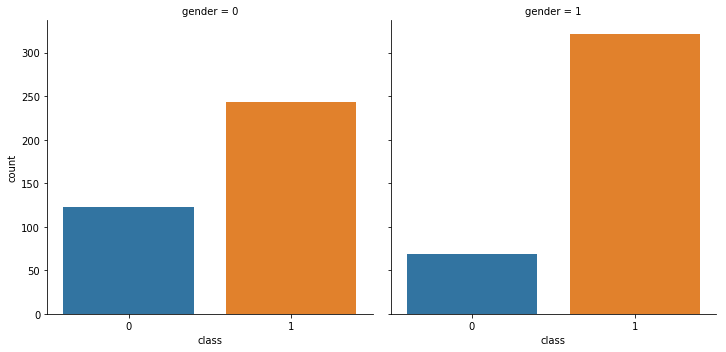

In [12]:
import seaborn as sns

# How does the parkinsons disease depend on the gender?
plot = sns.catplot(x="class", col="gender", data=df, kind="count")

#### Target variable

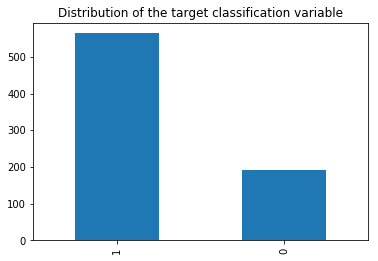

In [13]:
fig, ax = plt.subplots()
fig = df["class"].value_counts().plot(kind="bar", ax=ax)
ax.set_title("Distribution of the target classification variable")
plt.show()

#### Histograms for each variable

In [14]:
columns_start = 1
columns_end = 21

def choose_grid(nr):
    # // 4 + 1
    return nr // 4, 4 

<Figure size 432x288 with 0 Axes>

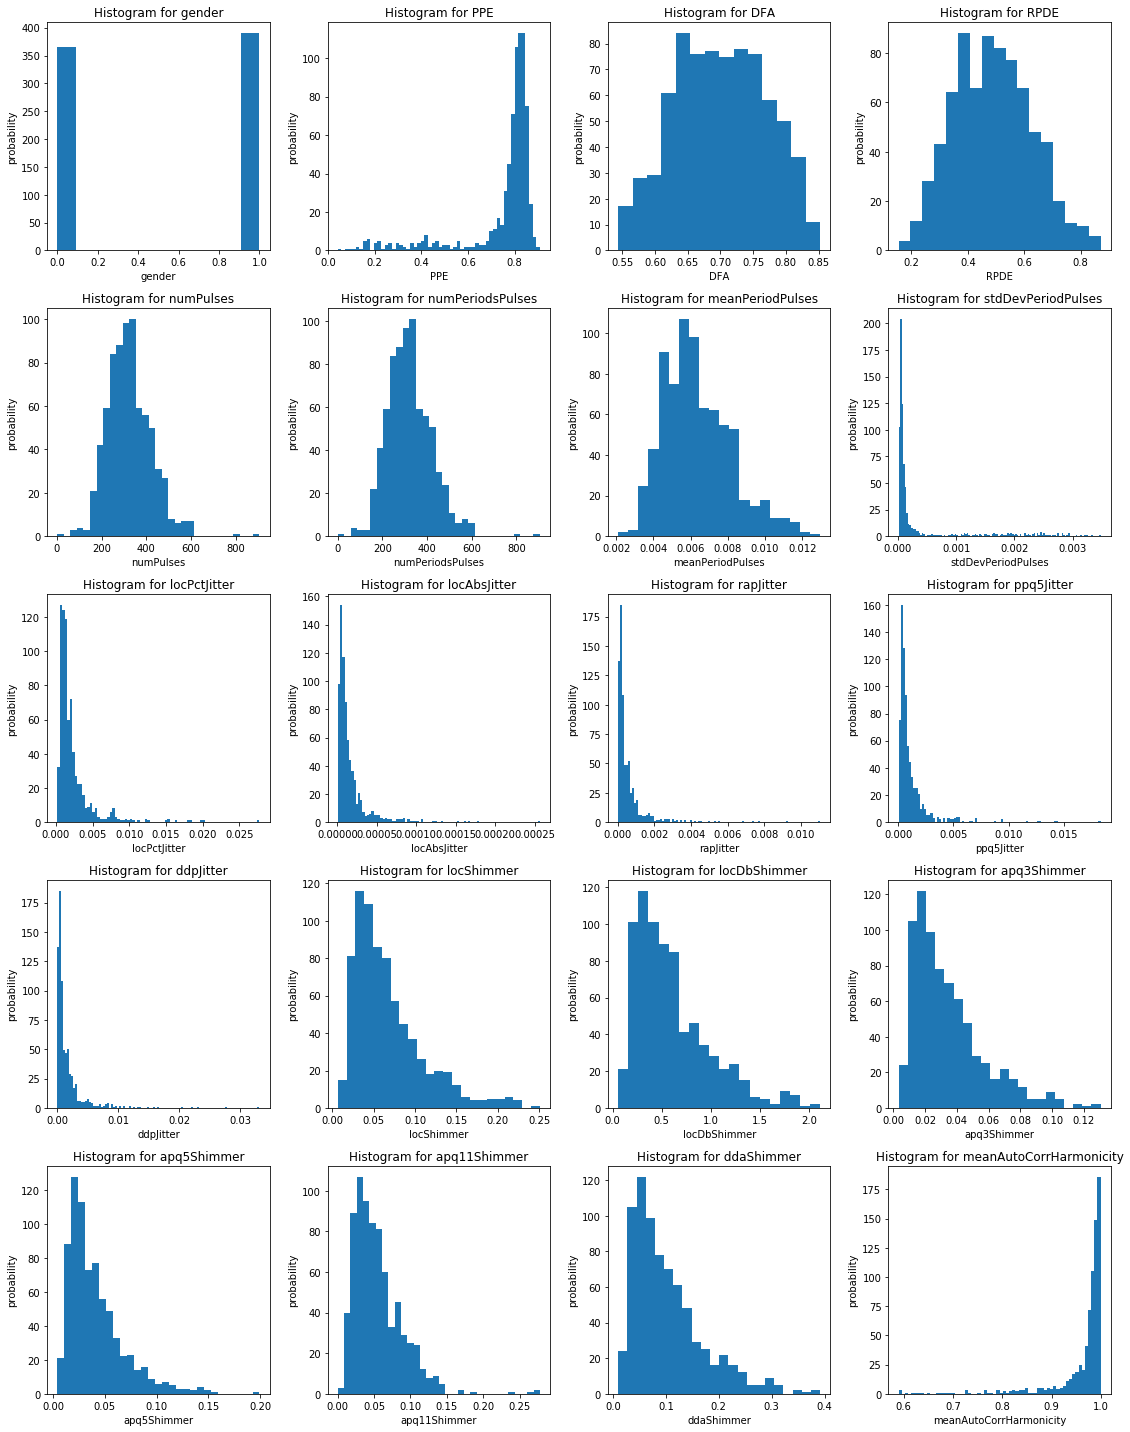

In [15]:
columns = df.iloc[:,columns_start:columns_end].select_dtypes(include='number').columns
rows, cols = choose_grid(len(columns))
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    axs[i, j].set_title('Histogram for %s'%columns[n])
    axs[i, j].set_xlabel(columns[n])
    axs[i, j].set_ylabel("probability")
    axs[i, j].hist(df.iloc[:,columns_start:columns_end][columns[n]].dropna().values, 'auto')
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

#### Correlation matrix
The number of paramaters is really high

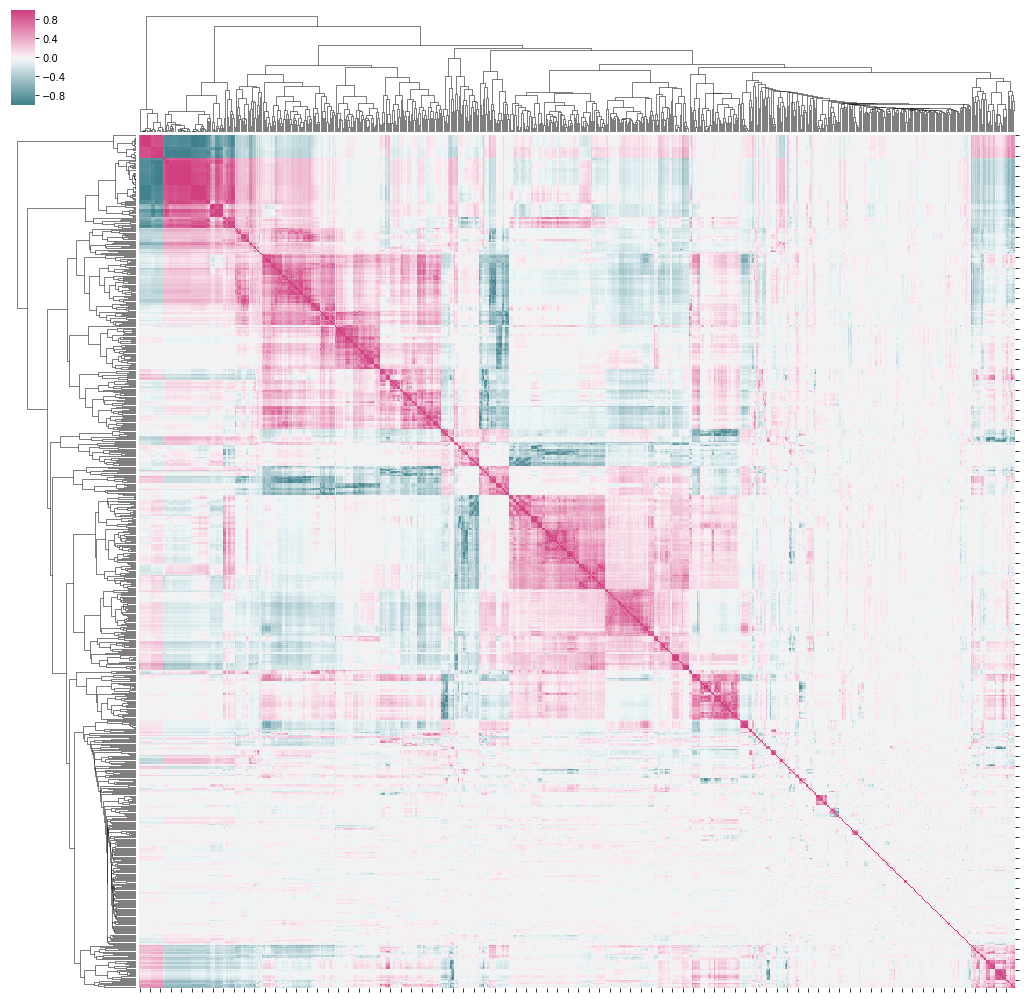

In [16]:
cmap = sns.diverging_palette(h_neg=210, h_pos=350, as_cmap=True)
graph = sns.clustermap(df.corr(), figsize=(18, 18), cmap=cmap);
a = graph.ax_heatmap.set_xticklabels([])
a = graph.ax_heatmap.set_yticklabels([])

#### Correlation of attributes with the target variable

In [17]:
# Calculate the correlation of each attribute
corcolumns = df.drop(columns=["class"]).corrwith(df["class"])
corcolumns = pd.DataFrame(corcolumns, columns=["correlation"])
corcolumns["abs_correlation"] = abs(corcolumns.correlation)

# Sort the most correlated values
corcolumns = corcolumns.sort_values(by="abs_correlation", ascending=False)

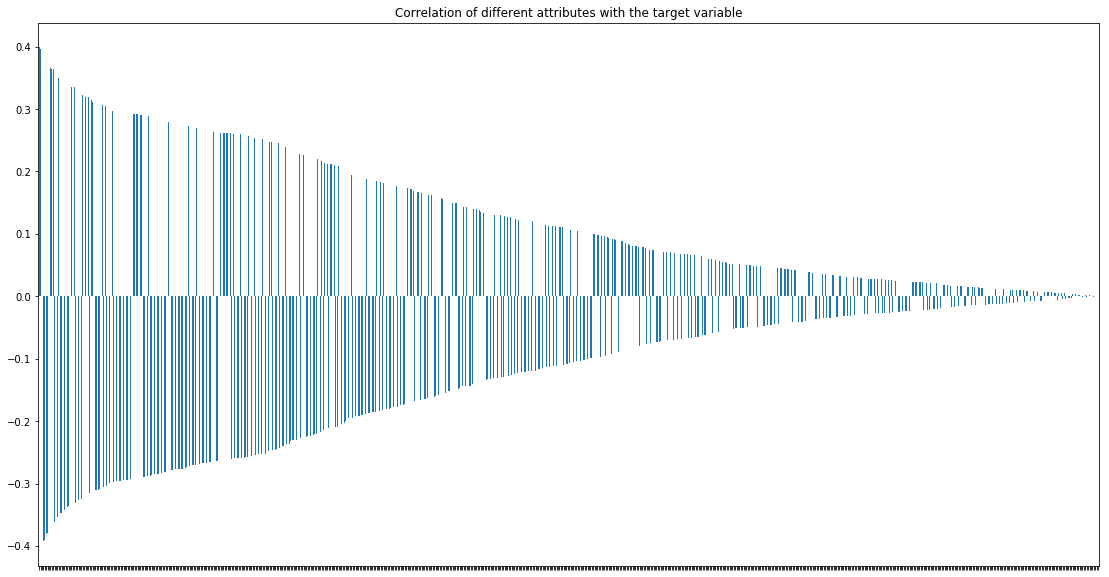

In [18]:
fig, ax = plt.subplots(figsize=(19, 10))
corcolumns.correlation.plot(kind="bar", title="Correlation of different attributes with the target variable", ax=ax)
ax.set_xticklabels([])
plt.show()

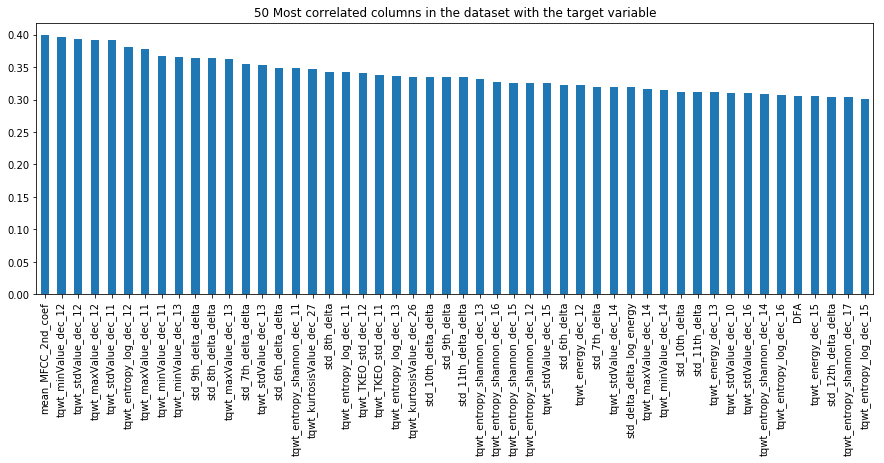

In [19]:
plt.figure(figsize=(15, 5))
corcolumns.abs_correlation.iloc[:50].plot(kind="bar", title="50 Most correlated columns in the dataset with the target variable")
plt.show()

## Preprocessing (20%)
- Average the data samples?
- Create 3 different datasets by each patient?
- **Remove outliers?**

**Tips from the lab:**
- subsampling
    - select only some of the data
- oversampling
    - suplicate some data
    - works for some algorithms
- SMOTE
    - looks for similiar variables

### Remove duplicates

In [20]:
dups = df[df.duplicated()]
print("The dataset contains {} duplicates - ID(s): {}".format(len(dups), dups.id.values))

# Drop the duplicate values
df = df.drop_duplicates()

The dataset contains 1 duplicates - ID(s): [37]


### Train / Test Split

- Stratified validation?
- Should preprocessing be done inside cross validation?

20% of the data is put away for testing. Cross validation is used instead of the train/test array.

In [123]:
test_size = 0.20
valid_size = 0.20

Custom train/test split assures that there are no samples of same ID mixed in the train/valid dataset.

In [22]:
from sklearn.model_selection import train_test_split, GroupKFold
from sklearn.metrics import accuracy_score

In [23]:
train_id, test_id = next(GroupKFold(n_splits=6).split(df, groups=df.id))

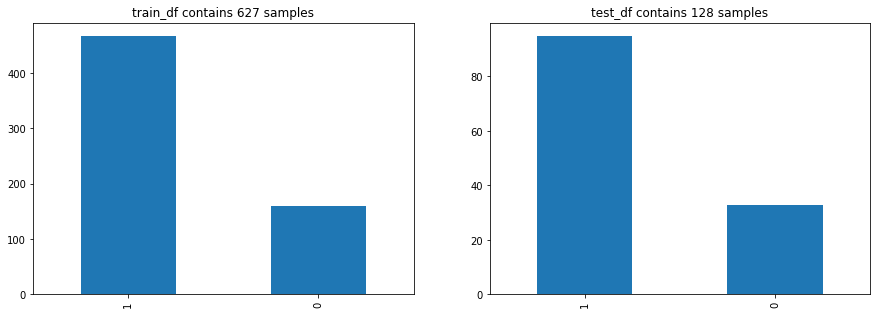

Performance of naive model that only predicts one class should be 0.6603.


In [24]:
from sklearn.model_selection import StratifiedKFold

# Shuffle the dataframe
df = df.sample(frac=1)

classes = pd.DataFrame(df.groupby("id").first()["class"])

train_id, test_id = next(StratifiedKFold(n_splits=6).split(classes, classes["class"]))
train_df, test_df = (df[df.id.isin(train_id)], df[df.id.isin(test_id)])

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
train_df["class"].value_counts().plot(kind="bar", title="train_df contains %d samples" % len(train_df))
plt.subplot(1, 2, 2)
test_df["class"].value_counts().plot(kind="bar", title="test_df contains %d samples" % len(test_df))
plt.show()

vc = train_df["class"].value_counts()
print("Performance of naive model that only predicts one class should be {:0.4f}.".format(1 - (vc[0] / vc[1])))

#### K-Fold CV

In [25]:
from sklearn.preprocessing import Normalizer, StandardScaler

In [26]:
X_train = train_df.drop(columns=["class"])
y_train = train_df["class"]
X_test = test_df.drop(columns=["class"])
y_test = test_df["class"]

X_train_c = X_train.drop(columns=["id"])
X_train_n = pd.DataFrame(Normalizer().fit_transform(X_train_c), columns=X_train_c.columns)
X_train_s = pd.DataFrame(StandardScaler().fit_transform(X_train_c), columns=X_train_c.columns)

gkf_c = list(GroupKFold(n_splits=5).split(X_train_c, y_train, X_train.id))
gkf_n = list(GroupKFold(n_splits=5).split(X_train_n, y_train, X_train.id))
gkf_s = list(GroupKFold(n_splits=5).split(X_train_s, y_train, X_train.id))

## Unsupervised (15%)
- Association Rules (7.5%)
- Clustering (7.5%)

### Association Rules (7.5%)

First we need to convert numerical data to binary.

In [68]:
from sklearn.feature_selection import SelectKBest, f_classif

# Top 50 features generated from SelectKBest
KBestSelector = SelectKBest(f_classif).fit(X_train_c, y_train)
feature_scores = pd.DataFrame({"Feature": X_train_c.columns, "Scores": KBestSelector.scores_})
top50k = feature_scores.sort_values(by="Scores", ascending=False)["Feature"].iloc[:50].values

# Top 50 correlated with target variable
top50c = corcolumns.abs_correlation[:50].index.values

print("{} out of 50 most correlated values overlap with SelectKBest".format(len(np.intersect1d(top50k, top50c))))

43 out of 50 most correlated values overlap with SelectKBest


In [87]:
# Select top 50 columns
df_top50cols = X_train_c.loc[:, X_train_c.columns.isin(top50k)]
df_top50cols["class"] = y_train

In [90]:
# First cut the numerical variables into classes and transform them to one-hot
for col in df_top50cols:
    if col != "class":
        df_top50cols[col] = pd.get_dummies(
            pd.cut(df_top50cols[col], 3, labels=[0, 1, 2])
        )

In [119]:
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import LabelBinarizer

frequent_itemsets = {}
minpaterns = 2000
minsup = 1.0
classrules = None
while minsup > 0:    
    minsup = minsup * 0.9
    frequent_itemsets = apriori(df_top50cols, min_support=minsup, use_colnames=True, verbose=0)
    
    frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.9)
    classrules = rules[rules['consequents'] == {'class'}]
    
    print("Minsup {} found {} patterns out of which {} contain class consequent"
          .format(minsup, len(frequent_itemsets), len(classrules)))  
    
    if len(frequent_itemsets) >= minpaterns:
        print("Minimum support:", minsup)
        print("Number of found patterns:", len(frequent_itemsets))
        break

Minsup 0.9 found 21 patterns out of which 0 contain class consequent
Minsup 0.81 found 148 patterns out of which 0 contain class consequent
Minsup 0.7290000000000001 found 312 patterns out of which 0 contain class consequent
Minsup 0.6561000000000001 found 539 patterns out of which 0 contain class consequent
Minsup 0.5904900000000002 found 1015 patterns out of which 0 contain class consequent
Minsup 0.5314410000000002 found 1425 patterns out of which 0 contain class consequent
Minsup 0.47829690000000014 found 1838 patterns out of which 0 contain class consequent
Minsup 0.43046721000000016 found 2018 patterns out of which 16 contain class consequent
Minimum support: 0.43046721000000016
Number of found patterns: 2018


In [121]:
classrules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
25,(std_8th_delta_delta),(class),0.483254,0.746411,0.438596,0.907591,1.215939,0.077890,2.744190
297,"(std_8th_delta_delta, tqwt_minValue_dec_11)",(class),0.481659,0.746411,0.438596,0.910596,1.219965,0.079081,2.836435
305,"(tqwt_minValue_dec_12, std_8th_delta_delta)",(class),0.478469,0.746411,0.438596,0.916667,1.228098,0.081462,3.043062
311,"(std_8th_delta_delta, tqwt_minValue_dec_13)",(class),0.478469,0.746411,0.438596,0.916667,1.228098,0.081462,3.043062
314,"(tqwt_minValue_dec_14, std_8th_delta_delta)",(class),0.480064,0.746411,0.435407,0.906977,1.215116,0.077082,2.726077
1569,"(tqwt_minValue_dec_12, std_8th_delta_delta, tq...",(class),0.476874,0.746411,0.438596,0.919732,1.232206,0.082652,3.159290
1584,"(std_8th_delta_delta, tqwt_minValue_dec_13, tq...",(class),0.476874,0.746411,0.438596,0.919732,1.232206,0.082652,3.159290
1591,"(tqwt_minValue_dec_14, std_8th_delta_delta, tq...",(class),0.478469,0.746411,0.435407,0.910000,1.219167,0.078272,2.817650
1603,"(tqwt_minValue_dec_12, std_8th_delta_delta, tq...",(class),0.478469,0.746411,0.438596,0.916667,1.228098,0.081462,3.043062
1610,"(tqwt_minValue_dec_12, std_8th_delta_delta, tq...",(class),0.475279,0.746411,0.435407,0.916107,1.227349,0.080653,3.022775


### Clustering (7.5%)

In [250]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

def dendrogram_plot(data):
    linkageMatrix = linkage(data, "single")

    plt.figure(figsize=(25, 10))
    plt.title('Hierarchical clustering dendrogram')
    plt.xlabel('point index')
    plt.ylabel('distance')
    dendrogram(linkageMatrix, truncate_mode='lastp', p=24,
        leaf_rotation=90., leaf_font_size=8.)
    plt.show()

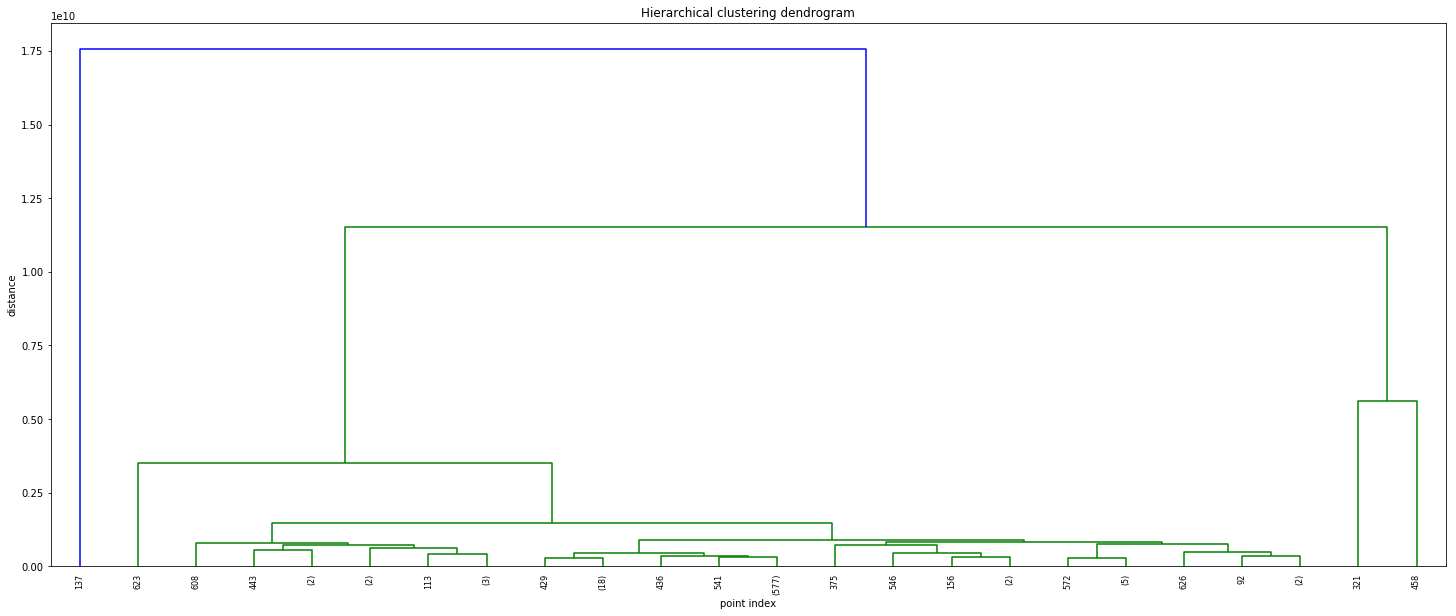

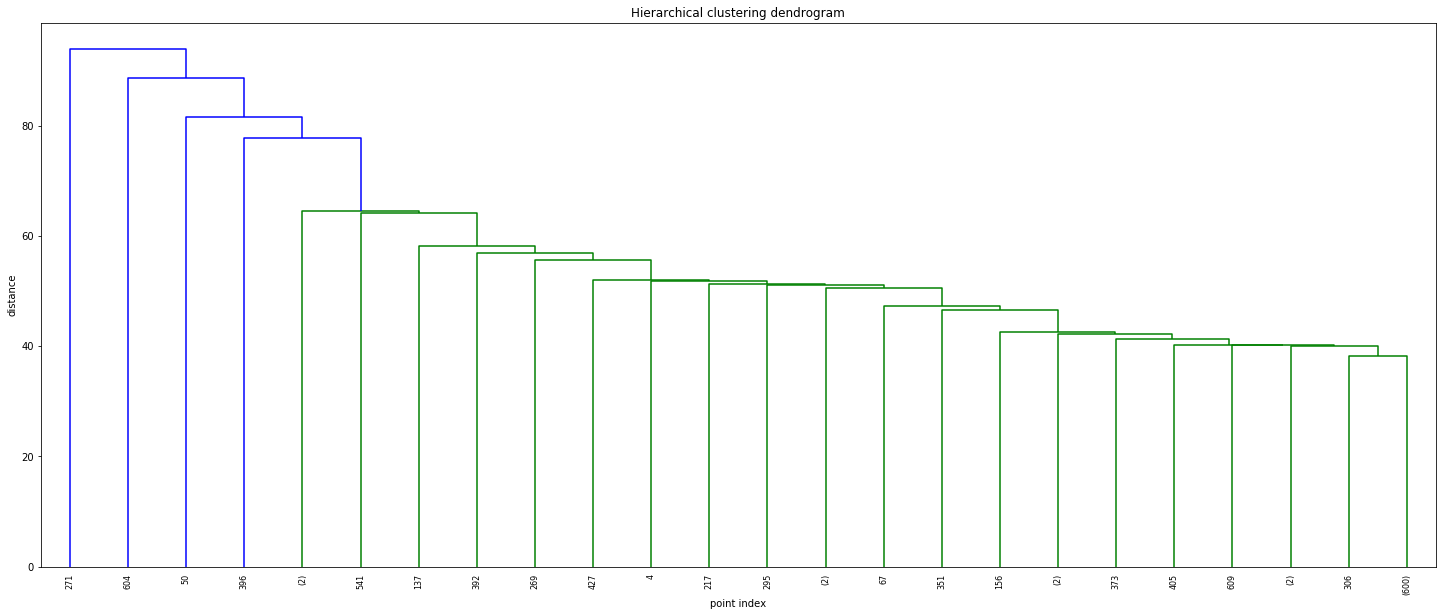

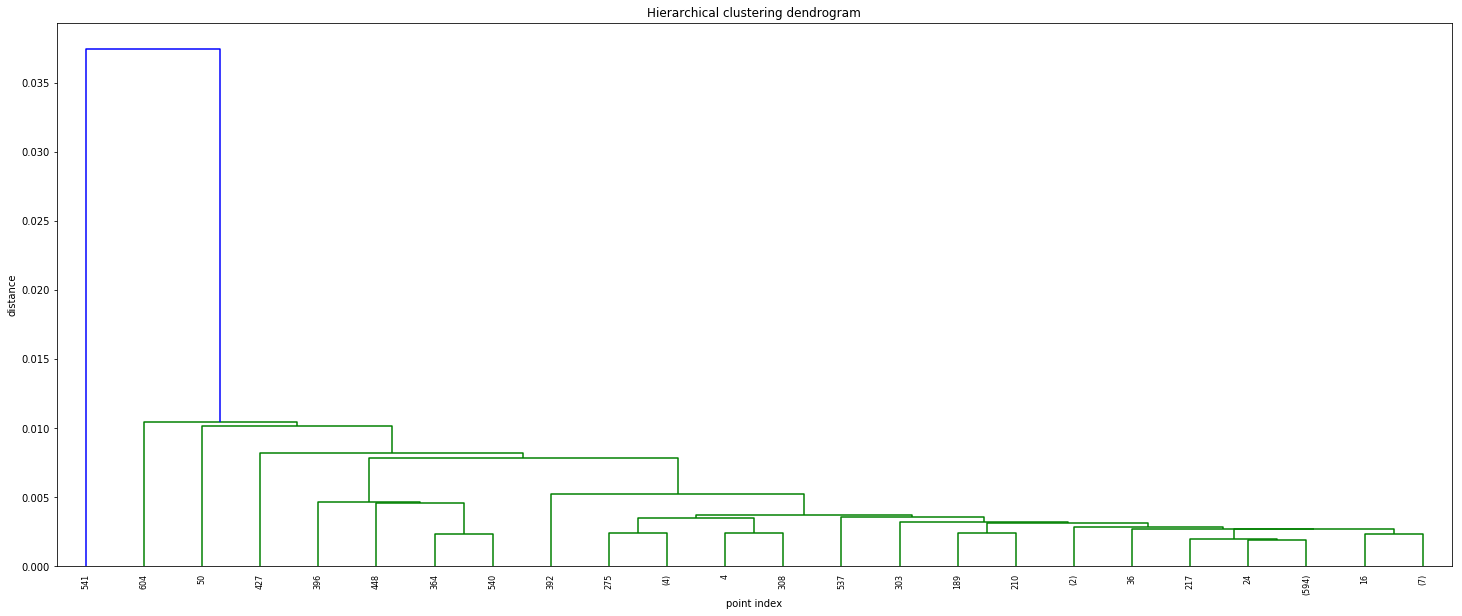

In [251]:
dendrogram_plot(X_train_c)
dendrogram_plot(X_train_s)
dendrogram_plot(X_train_n)

In [252]:
from sklearn.cluster import KMeans
import numpy as np

def elbow_plot(data):
    # Find the best number of clusters
    inertia = []
    for i in range(1,25):
        kmeans = KMeans(n_clusters=i, random_state=420)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)

    # Plot the elbow graph
    plt.plot(range(1,25), inertia)
    plt.xlabel("k")
    plt.ylabel('utility function')
    plt.show()

- sub groups within the class
- c_width
- randindex

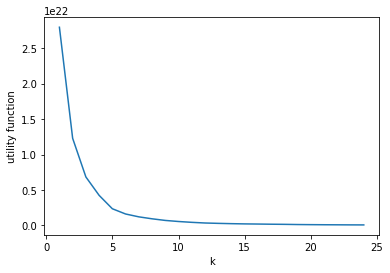

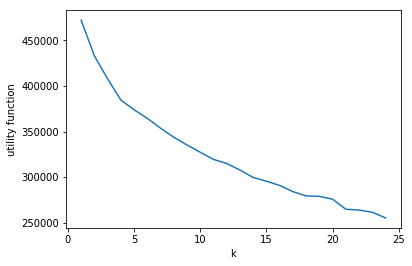

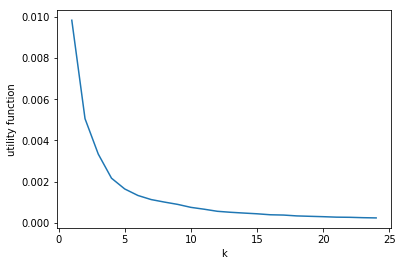

In [253]:
elbow_plot(X_train_c)
elbow_plot(X_train_s)
elbow_plot(X_train_n)

In [254]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d(data, colors):
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(30, 240)
    for i, v in enumerate(sorted(data["cluster"].unique())):
        clusterdata = data[data["cluster"] == v]        
        cld_t = clusterdata[clusterdata["class"] == 1]
        cld_f = clusterdata[clusterdata["class"] == 0]
        ax.scatter(cld_t.x, cld_t.y, cld_t.z, c = colors[i], alpha=0.5, marker="x")
        ax.scatter(cld_f.x, cld_f.y, cld_f.z, c = colors[i], alpha=0.5, marker="o")


def plot_2d(data, colors):
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111)
    for i, v in enumerate(sorted(data["cluster"].unique())):
        clusterdata = data[data["cluster"] == v]
        cld_t = clusterdata[clusterdata["class"] == 1]
        cld_f = clusterdata[clusterdata["class"] == 0]
        ax.scatter(cld_t.x, cld_t.y, c = colors[i], alpha=0.5, marker="x")
        ax.scatter(cld_f.x, cld_f.y, c = colors[i], alpha=0.5, marker="o")

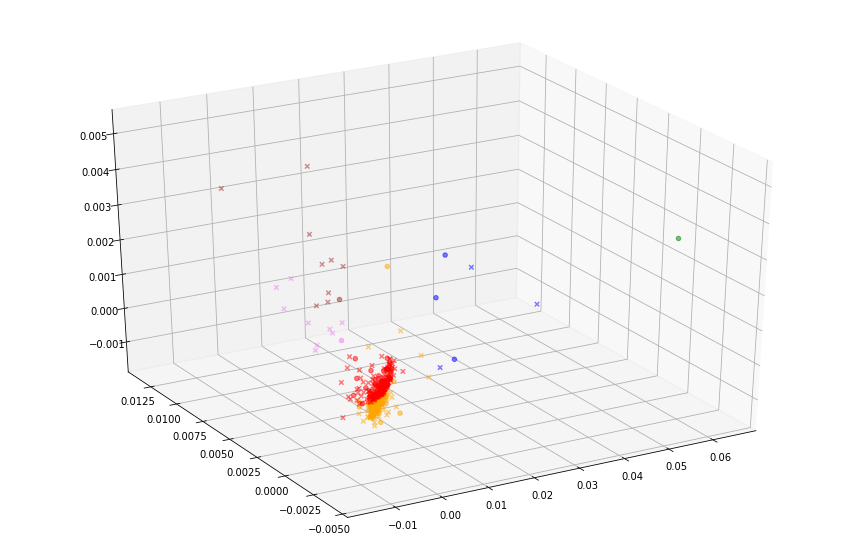

In [255]:
from sklearn.decomposition import PCA

dfc = X_train_n.copy()
dfc['cluster'] = KMeans(n_clusters=6, init='k-means++', random_state=420).fit_predict(X_train_n)

# Reduce dimensionality to 3D
_dfc = PCA(n_components=3).fit_transform(dfc.drop(columns=["cluster"]))

dfc["x"] = _dfc[:,0]
dfc["y"] = _dfc[:,1]
dfc["z"] = _dfc[:,2]
dfc['class'] = df["class"]

plot_3d(dfc, ["red", "green", "blue", "orange", "violet", "brown"])

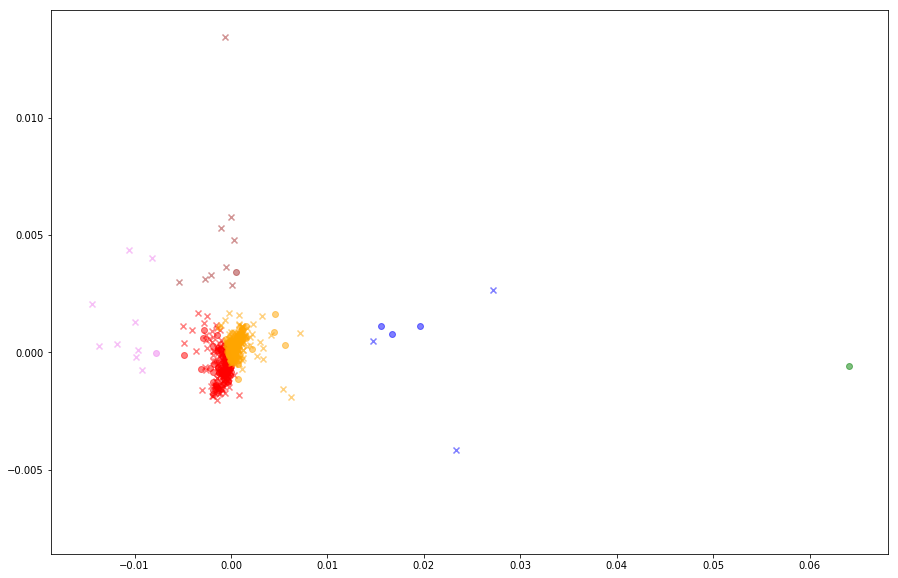

In [256]:
dfc = X_train_n.copy()
dfc['cluster'] = KMeans(n_clusters=6, init='k-means++', random_state=420).fit_predict(X_train_n)

# Reduce dimensionality to 2D
_dfc = PCA(n_components=2).fit_transform(dfc.drop(columns=["cluster"]))

dfc["x"] = _dfc[:,0]
dfc["y"] = _dfc[:,1]

dfc['class'] = df["class"]

plot_2d(dfc, ["red", "green", "blue", "orange", "violet", "brown"])

## Classification (20%)
- Naïve Bayes (2%)
- Instance-based Learning (3%)
- Decision Trees (5%)
- Random Forests (5%)
- XGBoost (5%)

In [125]:
# Best model results are stored in the results dictionary
results = {}

### GaussianNB - Naïve Bayes (2%)
- Does not work with correlated columns

#### Original dataset

In [234]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

gaus = GaussianNB()
results["GaussianNB"] = cross_val_score(gaus, X_train_c, y_train, cv=gkf_c, verbose=0, n_jobs=8).mean()
print("GaussianNB score: {:0.4f}".format(results["GaussianNB"]))

GaussianNB score: 0.7185


#### Select K best parameters

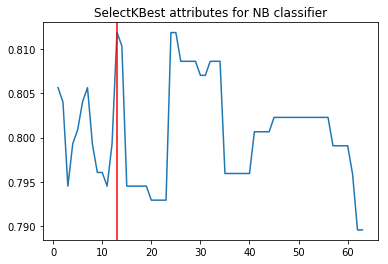

Best value 0.8119 with k=13.


In [238]:
from sklearn.feature_selection import SelectKBest, f_classif

x, y = ([], [])
for i in range(1, 64, 1):
    XX = SelectKBest(f_classif, k=i).fit_transform(X_train_c, y_train)
    g = GaussianNB().fit(XX, y_train)
    x.append(i)
    y.append(cross_val_score(g, XX, y_train, cv=gkf_c, n_jobs=8).mean())

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title("SelectKBest attributes for NB classifier")
ax.axvline(y.index(max(y))+1, c="red")
plt.show()

print("Best value {:0.4f} with k={}.".format(max(y), x[y.index(max(y))]))

Best value 0.8119 with k=13.

LDA

#### PCA

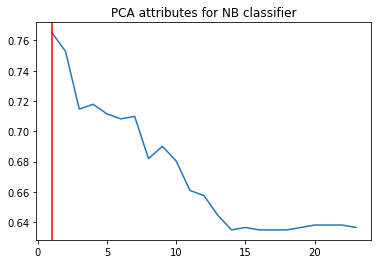

Best value 0.7654 with k=1.


In [239]:
from sklearn.decomposition import PCA

x, y = ([], [])
for i in range(1, 24, 1):
    XX = PCA(n_components=i).fit_transform(X_train_c)
    g = GaussianNB().fit(XX, y_train)
    x.append(i)
    y.append(cross_val_score(g, XX, y_train, cv=gkf_c, n_jobs=8).mean())

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title("PCA attributes for NB classifier")
ax.axvline(y.index(max(y))+1, c="red")
plt.show()

print("Best value {:0.4f} with k={}.".format(max(y), x[y.index(max(y))]))

Best value 0.7654 with k=1.

### KNeighborsClassifier – Instance-based Learning (3%)
- Suffers from curse of dimensionality, should normalize

In [257]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

grid = {'n_neighbors': np.arange(1, 15),
        'algorithm': ["auto", "ball_tree", "kd_tree", "brute"],
        'weights': ["uniform", "distance"],
        'leaf_size': np.arange(2, 40, 5)}

knnclas = GridSearchCV(KNeighborsClassifier(), grid, cv=gkf_c, verbose=0, n_jobs=8)\
    .fit(X_train_c, y_train)
knn_raw_score = knnclas.best_score_.mean()
print("KNeighborsClassifier best score: {:0.4f} for {}.".format(knnclas.best_score_, knnclas.best_params_))

KNeighborsClassifier best score: 0.7477351916376307 for {'algorithm': 'auto', 'leaf_size': 2, 'n_neighbors': 5, 'weights': 'uniform'}.


KNeighborsClassifier best score: 0.7477351916376307 for {'algorithm': 'auto', 'leaf_size': 2, 'n_neighbors': 5, 'weights': 'uniform'}.

##### Normalized data

In [258]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

grid = {'n_neighbors': np.arange(1, 15),
        'algorithm': ["auto", "ball_tree", "kd_tree", "brute"],
        'weights': ["uniform", "distance"],
        'leaf_size': np.arange(2, 40, 5)}

knnclas = GridSearchCV(KNeighborsClassifier(), grid, cv=gkf_n, verbose=0, n_jobs=8)\
    .fit(X_train_n, y_train)
knn_normal_score = knnclas.best_score_.mean()
print("KNeighborsClassifier best score: {:0.4f} for {}.".format(knnclas.best_score_, knnclas.best_params_))

KNeighborsClassifier best score: 0.7511961722488039 for {'algorithm': 'auto', 'leaf_size': 2, 'n_neighbors': 13, 'weights': 'uniform'}.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


KNeighborsClassifier best score: 0.7511961722488039 for {'algorithm': 'auto', 'leaf_size': 2, 'n_neighbors': 13, 'weights': 'uniform'}.

##### Standardized data

In [259]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

grid = {'n_neighbors': np.arange(1, 15),
        'algorithm': ["auto", "kd_tree"], # "ball_tree", "brute"
        'weights': ["uniform", "distance"],
        'leaf_size': np.arange(2, 40, 5)}

knnclas = GridSearchCV(KNeighborsClassifier(), grid, cv=gkf_s, verbose=0, n_jobs=8)\
    .fit(X_train_s, y_train)
knn_standard_score = knnclas.best_score_.mean()
print("KNeighborsClassifier best score: {:0.4f} for {}.".format(knnclas.best_score_, knnclas.best_params_))

KNeighborsClassifier best score: 0.8229665071770335 for {'algorithm': 'auto', 'leaf_size': 2, 'n_neighbors': 14, 'weights': 'uniform'}.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


KNeighborsClassifier best score: 0.8229665071770335 for {'algorithm': 'auto', 'leaf_size': 2, 'n_neighbors': 14, 'weights': 'uniform'}.

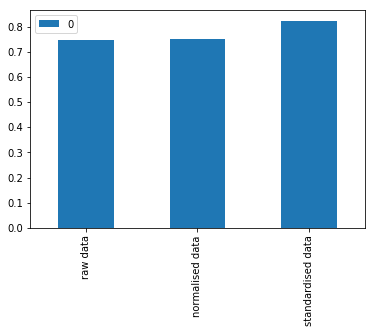

In [301]:
scores = [knn_raw_score, knn_normal_score, knn_standard_score]
knn_scores = pd.DataFrame(scores, index=["raw data", "normalised data", "standardised data"]).plot(kind="bar")
plt.show()

# Save the best score
results["KNeighborsClassifier"] = max(scores)

if not normalized, it would take in mind the biggest values

### DecisionTreeClassifier - Decision Trees (5%)

In [261]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

grid = {'criterion': ['gini'],
        'min_samples_split' : np.arange(3, 15, 2),
        'min_samples_leaf' : np.arange(3, 5, 1),
        'max_depth': np.arange(4, 12, 1)}

dtc = GridSearchCV(DecisionTreeClassifier(), grid, cv=gkf_c, verbose=0, n_jobs=8).fit(X_train_c, y_train)
results["DecisionTreeClassifier"] = dtc.best_score_.mean()
print("DecisionTreeClassifier best score: {:0.4f} for {}.".format(dtc.best_score_.mean(), dtc.best_params_))

DecisionTreeClassifier best score: 0.7830940988835726 for {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 9}.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


DecisionTreeClassifier best score: 0.7831 for {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 9}.

### RandomForestClassifier - Random Forests (5%)

In [262]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

grid = {'max_features' : np.arange(5, 9, 2),
        'n_estimators' : np.arange(30, 120, 30),
        'max_depth': np.arange(6, 13, 1),
        'min_samples_leaf': np.arange(1, 4, 1),
        'min_samples_split': np.arange(0.001, 0.3, 0.1)}

randf = GridSearchCV(RandomForestClassifier(), grid, cv=gkf_c, verbose=0, n_jobs=8).fit(X_train_c, y_train)
results["RandomForestClassifier"] = randf.best_score_.mean()
print("RandomForestClassifier best score: {:0.4f} for {}.".format(randf.best_score_.mean(), randf.best_params_))

RandomForestClassifier best score: 0.8389 for {'max_depth': 11, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 0.001, 'n_estimators': 90}.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomForestClassifier best score: 0.8389 for {'max_depth': 11, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 0.001, 'n_estimators': 90}.

### XGBClassifier - XGBoost (5%)

In [263]:
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

grid = {"learning_rate": [0.15, 0.2, 5],
        "max_depth": [7, 8, 9],
        "min_child_weight": [1, 2, 3],
        "gamma": [0.0, 0.025, 0.5],
        "colsample_bytree": [0.65, 0.7, 0.75]}

xgbclas = GridSearchCV(XGBClassifier(), grid, cv=gkf_c, verbose=0, n_jobs=8).fit(X_train_c, y_train)
print("XGBClassifier best score: {:0.4f} for {}.".format(xgbclas.best_score_.mean(), xgbclas.best_params_))
results["XGBClassifier"] = xgbclas.best_score_.mean()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


XGBClassifier best score: 0.8421 for {'colsample_bytree': 0.75, 'gamma': 0.5, 'learning_rate': 0.15, 'max_depth': 9, 'min_child_weight': 3}.


XGBClassifier best score: 0.8421 for {'colsample_bytree': 0.75, 'gamma': 0.5, 'learning_rate': 0.15, 'max_depth': 9, 'min_child_weight': 3}.

## Select the best classifier

In [299]:
import matplotlib
cm = matplotlib.cm.get_cmap("Accent")

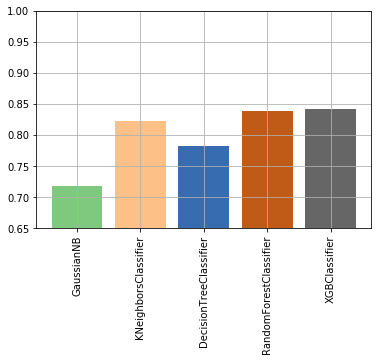

In [300]:
import matplotlib.pyplot as plt

plt.ylim(bottom=0.65, top=1)
plt.bar(range(len(results)), list(results.values()), align='center', color=cm(np.linspace(0, 1, len(results))))
plt.xticks(range(len(results)), list(results.keys()), rotation="vertical")
plt.grid()
plt.show()

# Unused stuff

---
---
---